In [28]:
import numpy as np
from scipy.interpolate import interp1d as interp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from src.thunderflask import thunderflask
from src.bacteria import strain
from src.ffgen import ffgen
from src.ffgen_isaac import ffgen
from src.redGen import reductionist
from src.codonTable import codonTable
from src.codonUtils import utils
from src.bacteria import strain
import pickle
from src.codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cProfile
import copy
import random

In [11]:
#Import reductionist table
with open('res/reductionistDictForPaper.pickle', 'rb') as handle:
    reductionistdict = pickle.load(handle)

In [12]:
reductionistTable = reductionistdict
reductionistTable.dictToTable()

U        C        A        G
U U  UUU : *  UCU : S  UAU : *  UGU : *
  C  UUC : F  UCC : *  UAC : Y  UGC : C
  A  UUA : *  UCA : *  UAA : *  UGA : *
  G  UUG : *  UCG : *  UAG : *  UGG : W
C U  CUU : L  CCU : *  CAU : H  CGU : *
  C  CUC : *  CCC : *  CAC : *  CGC : *
  A  CUA : *  CCA : *  CAA : *  CGA : R
  G  CUG : *  CCG : P  CAG : Q  CGG : *
A U  AUU : I  ACU : *  AAU : *  AGU : *
  C  AUC : *  ACC : *  AAC : N  AGC : *
  A  AUA : *  ACA : T  AAA : K  AGA : *
  G  AUG : M  ACG : *  AAG : *  AGG : *
G U  GUU : *  GCU : *  GAU : *  GGU : *
  C  GUC : V  GCC : A  GAC : D  GGC : *
  A  GUA : *  GCA : *  GAA : *  GGA : *
  G  GUG : *  GCG : *  GAG : E  GGG : G

A Jupyter Widget

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


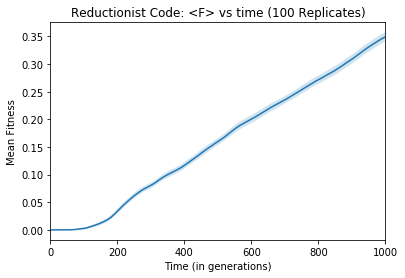

done


In [13]:
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 100
T_sim = 1000
t_extra = 5
date = '3-6'
code = 'Reductionist Code'
filepath = 'res/manuscript_traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm_notebook(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=reductionistTable, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param, show_progress=False)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [17]:
#import pickle
filename = 'res/ff16table_manuscript.pickle'
with open(filename, 'rb') as handle:
    ff16dict = pickle.load(handle)

In [19]:
ff16Table = codonTable(ff16dict)
ff16Table.dictToTable()

U        C        A        G
U U  UUU : A  UCU : *  UAU : *  UGU : *
  C  UUC : *  UCC : T  UAC : *  UGC : *
  A  UUA : *  UCA : *  UAA : D  UGA : *
  G  UUG : *  UCG : H  UAG : *  UGG : G
C U  CUU : *  CCU : I  CAU : *  CGU : *
  C  CUC : C  CCC : *  CAC : V  CGC : *
  A  CUA : *  CCA : *  CAA : *  CGA : F
  G  CUG : E  CCG : *  CAG : *  CGG : *
A U  AUU : *  ACU : H  AAU : P  AGU : *
  C  AUC : *  ACC : *  AAC : *  AGC : L
  A  AUA : K  ACA : *  AAA : *  AGA : *
  G  AUG : *  ACG : Q  AAG : C  AGG : *
G U  GUU : *  GCU : *  GAU : *  GGU : Y
  C  GUC : N  GCC : *  GAC : *  GGC : *
  A  GUA : *  GCA : S  GAA : *  GGA : *
  G  GUG : *  GCG : *  GAG : R  GGG : *

A Jupyter Widget

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


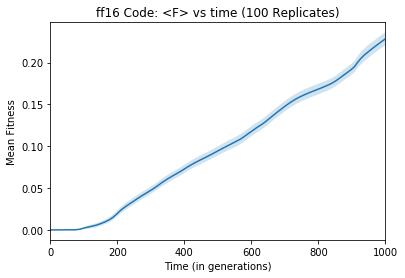

done


In [20]:
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 100
T_sim = 1000
t_extra = 5
date = '3-6'
code = 'ff16 Code'
filepath = 'res/manuscript_traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm_notebook(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=ff16Table, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param, show_progress=False)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [24]:
#import pickle
filename = 'res/ff_table_manuscript.pickle'
with open(filename, 'rb') as handle:
    ffdict = pickle.load(handle)

In [25]:
ffTable = codonTable(ffdict)
ffTable.dictToTable()

U        C        A        G
U U  UUU : *  UCU : *  UAU : Y  UGU : *
  C  UUC : C  UCC : *  UAC : *  UGC : *
  A  UUA : *  UCA : W  UAA : *  UGA : *
  G  UUG : *  UCG : *  UAG : E  UGG : V
C U  CUU : A  CCU : P  CAU : *  CGU : *
  C  CUC : *  CCC : D  CAC : *  CGC : *
  A  CUA : *  CCA : *  CAA : *  CGA : K
  G  CUG : *  CCG : *  CAG : S  CGG : *
A U  AUU : Q  ACU : *  AAU : *  AGU : I
  C  AUC : *  ACC : *  AAC : T  AGC : *
  A  AUA : G  ACA : *  AAA : *  AGA : *
  G  AUG : *  ACG : R  AAG : *  AGG : *
G U  GUU : *  GCU : H  GAU : *  GGU : *
  C  GUC : *  GCC : *  GAC : *  GGC : L
  A  GUA : *  GCA : M  GAA : F  GGA : *
  G  GUG : N  GCG : *  GAG : *  GGG : *

In [26]:
#import pickle
filename = 'res/fftable_manuscript.pickle'
with open(filename, 'rb') as handle:
    ffdict2 = pickle.load(handle)

In [27]:
ffTable = codonTable(ffdict2)
ffTable.dictToTable()

U        C        A        G
U U  UUU : A  UCU : *  UAU : *  UGU : *
  C  UUC : *  UCC : T  UAC : *  UGC : *
  A  UUA : *  UCA : *  UAA : D  UGA : *
  G  UUG : *  UCG : H  UAG : *  UGG : G
C U  CUU : *  CCU : I  CAU : *  CGU : *
  C  CUC : C  CCC : *  CAC : V  CGC : *
  A  CUA : *  CCA : *  CAA : *  CGA : F
  G  CUG : E  CCG : *  CAG : *  CGG : *
A U  AUU : *  ACU : H  AAU : P  AGU : *
  C  AUC : *  ACC : *  AAC : *  AGC : L
  A  AUA : K  ACA : *  AAA : *  AGA : *
  G  AUG : *  ACG : Q  AAG : C  AGG : *
G U  GUU : *  GCU : *  GAU : *  GGU : Y
  C  GUC : N  GCC : *  GAC : *  GGC : *
  A  GUA : *  GCA : S  GAA : *  GGA : *
  G  GUG : *  GCG : *  GAG : R  GGG : *

In [ ]:
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 100
T_sim = 1000
t_extra = 5
date = '3-6'
code = 'ff16 Code'
filepath = 'res/manuscript_traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm_notebook(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=ffTable, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param, show_progress=False)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')